In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c brain-motor-imagery-classification

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                          1MB  2024-04-10 09:48:38          19122        414  1.0              
ashishkumarak/netflix-reviews-playstore-daily-updated           Netflix Reviews [DAILY UPDATED]                     12MB  2024-05-15 23:27:44           1160         31  1.0              
jainaru/thyroid-disease-data                                    Thyroid Disease Data                                 3KB  2024-05-10 12:06:31           1243         30  1.0              
sahirmaharajj/school-student-daily-attendance                   S

In [2]:
pip install braindecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.2/165.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_

In [3]:
!unzip /content/brain-motor-imagery-classification.zip

Archive:  /content/brain-motor-imagery-classification.zip
  inflating: sample_submission.csv   
  inflating: test/00edaaa8-102d-4ee3-b531-0be67dcbd9e6.npy  
  inflating: test/01b63df8-05f9-4956-87f4-949ed9ae4dd6.npy  
  inflating: test/01bfd881-7850-49f1-ad32-ff9ae51e3e3f.npy  
  inflating: test/01d9002f-b086-4635-bf74-5316ceda3098.npy  
  inflating: test/028522a4-5332-4e84-b578-ce45ed5e4899.npy  
  inflating: test/0368a7cc-d6c6-416d-878e-edbcd562f317.npy  
  inflating: test/044841bc-050d-4c9f-92db-1ff1a7f306cb.npy  
  inflating: test/051581bf-c779-4d9c-86e9-324404b149ca.npy  
  inflating: test/06360991-5140-41a1-889f-3cb10b2241d0.npy  
  inflating: test/066dc317-8b3c-431e-b5d9-894abe3a4857.npy  
  inflating: test/06e9b7ab-0ee9-47a3-a500-a8dab4ee097f.npy  
  inflating: test/06f9ab25-f9b7-4a12-82f3-a3c92adcc645.npy  
  inflating: test/072dc9a9-7bfa-4da9-83d7-23b2ed5818e0.npy  
  inflating: test/075e9017-dace-441d-acbd-dd929c1a06f7.npy  
  inflating: test/0783e1ea-375e-4239-be7d-12177a54

<hr>

In [4]:
from scipy.signal import butter, filtfilt, iirnotch, freqz
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Band-pass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Notch filter
def notch_filter(data, cut_freq, fs, Q=30):
    nyq = 0.5 * fs
    freq = cut_freq / nyq
    b, a = iirnotch(freq, Q)
    y = filtfilt(b, a, data)
    return y

def filter03050(Ipsignal):
    sampling_rate = 250  # Hz
    # fft_signal = np.fft.fft(Ipsignal)
    # frequencies = np.fft.fftfreq(len(Ipsignal), 1/sampling_rate)
    filtered_signal = bandpass_filter(Ipsignal, 1, 30, sampling_rate)          # band-pass filter 0-30 Hz
    filtered_signal = notch_filter(filtered_signal, 50, sampling_rate)       # notch filter 50 Hz
    return filtered_signal

def filter0812_1826(Ipsignal):
    sampling_rate = 250  # Hz
    filtered_signal = bandpass_filter(Ipsignal, 8, 12, sampling_rate)          # band-pass filter 8-12 Hz
    filtered_signal = bandpass_filter(Ipsignal, 18,26, sampling_rate)          # band-pass filter 18-26 Hz
    return filtered_signal

def unique_name(Datapath):
    all_name = os.listdir(Datapath)
    new = []
    for un in all_name:
        i = un.replace("_data_time_series.npy","").replace("_data_time_stamps.npy","").replace("_label_time_series.npy","").replace("_label_time_stamps.npy","")
        new.append(i)
        unique_name = list(set(new))
    return unique_name

def check_different_duration(label_time_stamps):
    keep_time = []
    start_time = 0
    for current_time in list(label_time_stamps):
        keep_time.append(current_time-start_time)
        start_time = current_time
    keep_time = keep_time[1:]
    avgtime = sum(keep_time)/len(keep_time)
    stat = True
    for etime in keep_time:
        if 6.8 <= etime <= 7.5:
            stat = True
        else:
            stat = False
            break
    return stat,avgtime

file_path = "/content/train/train"
unique_name = unique_name(file_path)

In [6]:
unique_name.remove("s1_d2_p002_003")          # sameple ห่าง
unique_name.remove("s1_d2_p006_008")          # label != 30
unique_name.remove("s2_d2_p002_006")          # label != 30

In [7]:
def filter_one(windows,percent_pass):
    percentage_ones = (np.sum(windows==1)/len(windows))
    if percentage_ones >= percent_pass:
        return True
    return False

In [8]:
data_dataset  = []
label_dataset = []
for name in unique_name:
    # print(name)
    signals_series    = np.load(os.path.join(file_path,name+"_data_time_series.npy"))
    times             = np.load(os.path.join(file_path,name+"_data_time_stamps.npy"))
    label_time_series = np.load(os.path.join(file_path,name+"_label_time_series.npy"))
    label_time_stamps = np.load(os.path.join(file_path,name+"_label_time_stamps.npy"))
    signals = signals_series[:,:8]
    windows = signals_series[:,16]
    if not(filter_one(windows,1)):            # กรอง คุณภาพ 0,1
        continue
    stat,avgtime = check_different_duration(label_time_stamps)
    if not(stat):                               # กรอง ระยะห่างของ time_stamp
        continue
    if filter!=None:                            # Apply filter
        filtered_signal = []
        Dim = signals.shape[1]
        # print(Dim)
        for i in range(Dim):
            # print(f"{i} : {signals[:,i]}")
            filtered_signal.append(filter03050(signals[:,i]))
        signals = np.array(filtered_signal).T
    # sample_point = int(round(avgtime))
    # datapoint = 250 * sample_point                   # 250 Hz * 7 s
    for index in range(30):
        # start_point = index * datapoint
        # end_point = (index + 1) * datapoint
        # if end_point <= signals.shape[0]:  # Check to ensure slice is within the data range
        #     data_dataset.append(signals[start_point:end_point])
        # else:
        #     break
        sn = signals[1750*index:1750*(index+1)]
        if sn.shape[0]!=30 and sn.shape[1]!=8:
            print(name,"error")
        data_dataset.append(sn)
    label_dataset.append(label_time_series)
data_dataset = np.stack(data_dataset)

label_dataset = np.concatenate(label_dataset)
label_dataset = label_dataset.flatten().tolist()

In [9]:
# Demension check
data_dataset.shape

(1530, 1750, 8)

In [10]:
label_dataset = np.array(label_dataset)
label_dataset

array([120, 110, 150, ..., 150, 120, 110])

In [11]:
label_dataset.shape

(1530,)

<hr>

In [ ]:
from braindecode.models.util import models_dict
print(f'All the Braindecode models:\n{list(models_dict.keys())}')

All the Braindecode models:
['ATCNet', 'Deep4Net', 'DeepSleepNet', 'EEGConformer', 'EEGITNet', 'EEGInception', 'EEGInceptionERP', 'EEGInceptionMI', 'EEGNetv1', 'EEGNetv4', 'EEGResNet', 'HybridNet', 'ShallowFBCSPNet', 'SleepStagerBlanco2020', 'SleepStagerChambon2018', 'SleepStagerEldele2021', 'TCN', 'TIDNet', 'USleep']


In [12]:
from braindecode.models import ShallowFBCSPNet              # Import the model from braindecode * There are many model that available
import mne
import numpy as np

In [14]:
# Train spect config
model = ShallowFBCSPNet(
    n_chans   = 8,
    n_times   = 1750,
    n_outputs = 3,
    final_conv_length='auto',
)
print(model)

Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
ShallowFBCSPNet (ShallowFBCSPNet)        [1, 8, 1750]              [1, 3]                    --                        --
├─Ensure4d (ensuredims): 1-1             [1, 8, 1750]              [1, 8, 1750, 1]           --                        --
├─Rearrange (dimshuffle): 1-2            [1, 8, 1750, 1]           [1, 1, 1750, 8]           --                        --
├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1750, 8]           [1, 40, 1726, 1]          13,840                    --
├─BatchNorm2d (bnorm): 1-4               [1, 40, 1726, 1]          [1, 40, 1726, 1]          80                        --
├─Expression (conv_nonlin_exp): 1-5      [1, 40, 1726, 1]          [1, 40, 1726, 1]          --                        --
├─AvgPool2d (pool): 1-6                  [1, 40, 1726, 1]          [1, 40, 111, 1]           --                        [75, 1]
├─Express

In [15]:
data_dataset.shape

(1530, 1750, 8)

In [16]:
data_dataset = data_dataset.reshape(data_dataset.shape[0], 8, 1750)
data_dataset.shape

(1530, 8, 1750)

In [17]:
label_dataset.shape

(1530,)

In [18]:
label_dataset = np.array(label_dataset)
label_dataset

array([120, 110, 150, ..., 150, 120, 110])

In [19]:
# Map value
mapping = {110: 0,
           120: 1,
           150: 2}

mapped_label = np.vectorize(mapping.get)(label_dataset)
label = np.array(mapped_label)
label

array([1, 0, 2, ..., 2, 1, 0])

In [20]:
info = mne.create_info(
    ch_names = ['c1','c2','c3','c4','c5','c6','c7','c8'], sfreq=250., ch_types="eeg"
)
# data_dataset  # 100 epochs, 8 channels, 7 seconds (@250Hz)
epochs = mne.EpochsArray(data_dataset, info=info)


Not setting metadata
1530 matching events found
No baseline correction applied
0 projection items activated


In [21]:
from skorch.dataset import ValidSplit
from braindecode import EEGClassifier

In [22]:
net = EEGClassifier(
    'ShallowFBCSPNet',
    module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
    # To train a neural network you need validation split, here, we use 20%.
)
# Train model
net.fit(epochs, label)

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1      104.9389       0.3366       12.7832  24.8818
      2       68.6462       0.3464       88.1370  24.5952
      3       52.3849       0.3301       71.0814  23.8335
      4       31.7731       0.3170       62.5826  24.2592
      5       29.0515       0.3301       24.9082  24.6057
      6       20.3509       0.3105       43.3354  24.2118
      7       16.5467       0.3268       22.4878  27.1552
      8        7.7797       0.3268       33.7320  24.4991
      9       20.3509       0.3464       14.9726  24.9645
     10       11.3846       0.3333        9.5565  26.2126
     11       10.6822       0.3366       20.4484  24.3912
     12        8.3550       0.3105       10.4797  24.7990
     13        6.6066       0.2876       13.4091  24.7834
     14        6.3335       0.3072       11.6164  24.5325
     15        5.9540       0.3039        6.6316  24.0378


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=============================================================================================================================================
  Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
  ShallowFBCSPNet (ShallowFBCSPNet)        [1, 8, 1750]              [1, 3]                    --                        --
  ├─Ensure4d (ensuredims): 1-1             [1, 8, 1750]              [1, 8, 1750, 1]           --                        --
  ├─Rearrange (dimshuffle): 1-2            [1, 8, 1750, 1]           [1, 1, 1750, 8]           --                        --
  ├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1750, 8]           [1, 40, 1726, 1]          13,840                    --
  ├─BatchNorm2d (bnorm): 1-4               [1, 40, 1726, 1]          [1, 40, 1726, 1]          80                        --
  ├─Expression (conv_nonlin_exp): 

In [23]:
net1 = EEGClassifier(
    'Deep4Net',
    module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
    # To train a neural network you need validation split, here, we use 20%.
)
# Train model
net1.fit(epochs, label)

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.3901       0.3693        1.1735  25.7984
      2        1.3575       0.3431        1.1334  25.5247
      3        1.4759       0.3333        1.1138  25.5299
      4        1.2666       0.3268        1.1070  24.4881
      5        1.2287       0.3301        1.1191  25.2730
      6        1.2657       0.3235        1.1216  25.8794
      7        1.3106       0.3268        1.1289  26.7875
      8        1.3479       0.3562        1.1448  25.6092
      9        1.2614       0.3824        1.1229  24.3646
     10        1.2748       0.3170        1.1534  25.4166
     11        1.2212       0.3464        1.1163  25.5832
     12        1.3592       0.3562        1.1231  25.5983
     13        1.2051       0.3366        1.1128  25.3368
     14        1.2570       0.3529        1.1282  24.5924
     15        1.2317       0.3627        1.1253  25.5421


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=============================================================================================================================================
  Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
  Deep4Net (Deep4Net)                      [1, 8, 1750]              [1, 3]                    --                        --
  ├─Ensure4d (ensuredims): 1-1             [1, 8, 1750]              [1, 8, 1750, 1]           --                        --
  ├─Rearrange (dimshuffle): 1-2            [1, 8, 1750, 1]           [1, 1, 1750, 8]           --                        --
  ├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1750, 8]           [1, 25, 1741, 1]          5,275                     --
  ├─BatchNorm2d (bnorm): 1-4               [1, 25, 1741, 1]          [1, 25, 1741, 1]          50                        --
  ├─Expression (conv_nonlin): 1-5 

In [24]:
net2 = EEGClassifier(
    'EEGITNet',
    # module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
    # To train a neural network you need validation split, here, we use 20%.
)
# Train model
net2.fit(epochs, label)

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1040.)
  return F.conv2d(input, weight, bias, self.stride,


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.1465       0.3464        1.1215  26.1136
      2        1.1289       0.3399        1.1238  18.4000
      3        1.1330       0.3268        1.1018  19.0203
      4        1.1030       0.3333        1.1156  19.5753
      5        1.1044       0.3203        1.1153  19.8114
      6        1.0971       0.3333        1.1249  19.7904
      7        1.0862       0.3464        1.1458  18.3039
      8        1.0923       0.3268        1.1229  18.4020
      9        1.0939       0.3562        1.1023  19.7778
     10        1.1121       0.3562        1.1037  18.6004
     11        1.0833       0.3464        1.1007  18.5302
     12        1.0758       0.3627        1.1056  19.8153
     13        1.0737       0.3366        1.1302  18.4202
     14        1.0812       0.3464        1.1446  18.5791
     15        1.0571       0.3627        1.1125  19.8784


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=======================================================================================================================================================
  Layer (type (var_name):depth-idx)                  Input Shape               Output Shape              Param #                   Kernel Shape
  EEGITNet (EEGITNet)                                [1, 8, 1750]              [1, 3]                    --                        --
  ├─Sequential (input_preprocess): 1-1               [1, 8, 1750]              [1, 1, 8, 1750]           --                        --
  │    └─Ensure4d (0): 2-1                           [1, 8, 1750]              [1, 8, 1750, 1]           --                        --
  │    └─Rearrange (1): 2-2                          [1, 8, 1750, 1]           [1, 1, 8, 1750]           --                        --
  ├─_InceptionBlock (inception_block): 1-2           [1, 1, 8, 1750]           [1, 14, 1, 1750]   

In [25]:
net3 = EEGClassifier(
    'EEGInception',
    # module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
)
# Train model
net2.fit(epochs, label)

Re-initializing module because the following parameters were re-set: chs_info, n_outputs, n_times, sfreq.
Re-initializing criterion.
Re-initializing optimizer.


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.1453       0.3235        1.1049  18.3434
      2        1.1382       0.3366        1.0998  18.4757
      3        1.1324       0.3431        1.1042  20.0245
      4        1.1268       0.3562        1.1026  18.3931
      5        1.1080       0.3497        1.1092  18.7080
      6        1.1117       0.3529        1.0997  21.2839
      7        1.0967       0.3497        1.1006  18.4677
      8        1.1110       0.3497        1.1043  18.4454
      9        1.1105       0.3627        1.0992  19.9208
     10        1.0850       0.3627        1.0989  18.4724
     11        1.0759       0.3660        1.1002  18.3853
     12        1.0932       0.3464        1.0978  19.6994
     13        1.0810       0.3366        1.0982  18.3032
     14        1.0794       0.3366        1.0980  18.5916
     15        1.0836       0.3660        1.1010  20.3558


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=======================================================================================================================================================
  Layer (type (var_name):depth-idx)                  Input Shape               Output Shape              Param #                   Kernel Shape
  EEGITNet (EEGITNet)                                [1, 8, 1750]              [1, 3]                    --                        --
  ├─Sequential (input_preprocess): 1-1               [1, 8, 1750]              [1, 1, 8, 1750]           --                        --
  │    └─Ensure4d (0): 2-1                           [1, 8, 1750]              [1, 8, 1750, 1]           --                        --
  │    └─Rearrange (1): 2-2                          [1, 8, 1750, 1]           [1, 1, 8, 1750]           --                        --
  ├─_InceptionBlock (inception_block): 1-2           [1, 1, 8, 1750]           [1, 14, 1, 1750]   

In [26]:
net4 = EEGClassifier(
    'EEGInceptionERP',
    # module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
)
# Train model
net4.fit(epochs, label)

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.3214       0.3497        1.1098  52.6433
      2        1.3263       0.3235        1.1047  46.6446
      3        1.2968       0.3627        1.1074  48.1596
      4        1.2406       0.3464        1.1101  45.7172
      5        1.2483       0.3431        1.1132  46.2041
      6        1.2129       0.3203        1.1174  46.3600
      7        1.2028       0.3235        1.1206  46.5300
      8        1.2095       0.3333        1.1225  46.8245
      9        1.1899       0.3268        1.1258  47.2027
     10        1.1769       0.3235        1.1284  47.7962
     11        1.1687       0.3203        1.1294  46.9942
     12        1.1440       0.3203        1.1297  45.7420
     13        1.1851       0.3268        1.1263  45.8377
     14        1.1591       0.3235        1.1274  52.4276
     15        1.1381       0.3268        1.1256  48.0536


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=======================================================================================================================================================
  Layer (type (var_name):depth-idx)                  Input Shape               Output Shape              Param #                   Kernel Shape
  EEGInceptionERP (EEGInceptionERP)                  [1, 8, 1750]              [1, 3]                    --                        --
  ├─Sequential (final_block): 1-23                   --                        --                        (recursive)               --
  │    └─ELU (7): 2-1                                [1, 8, 1750]              [1, 8, 1750]              --                        --
  ├─Ensure4d (ensuredims): 1-2                       [1, 8, 1750]              [1, 8, 1750, 1]           --                        --
  ├─Rearrange (dimshuffle): 1-3                      [1, 8, 1750, 1]           [1, 1, 8, 1750]    

In [27]:
net5 = EEGClassifier(
    'EEGNetv1',
    # module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
)
# Train model
net5.fit(epochs, label)

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.4487       0.3301        1.1150  16.3994
      2        1.6482       0.3203        1.1344  15.9173
      3        1.4455       0.3595        1.2609  15.7977
      4        1.2783       0.3170        1.1366  15.5406
      5        1.3198       0.3562        1.2045  15.6670
      6        1.3417       0.3235        1.2165  15.6314
      7        1.3748       0.3170        1.0926  15.7032
      8        1.2695       0.3497        1.1054  15.9445
      9        1.2179       0.3333        1.1148  16.5235
     10        1.3168       0.3497        1.0952  15.7892
     11        1.1873       0.3366        1.0930  15.9360
     12        1.1796       0.3791        1.0930  15.7414
     13        1.1400       0.3595        1.1072  15.9551
     14        1.1885       0.3137        1.1438  15.8655
     15        1.2290       0.3235        1.1057  16.0666


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=============================================================================================================================================
  Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
  EEGNetv1 (EEGNetv1)                      [1, 8, 1750]              [1, 3]                    --                        --
  ├─Ensure4d (ensuredims): 1-1             [1, 8, 1750]              [1, 8, 1750, 1]           --                        --
  ├─Conv2d (conv_1): 1-2                   [1, 8, 1750, 1]           [1, 16, 1750, 1]          144                       [1, 1]
  ├─BatchNorm2d (bnorm_1): 1-3             [1, 16, 1750, 1]          [1, 16, 1750, 1]          32                        --
  ├─Expression (elu_1): 1-4                [1, 16, 1750, 1]          [1, 16, 1750, 1]          --                        --
  ├─Expression (permute_1): 1-

In [28]:
net6 = EEGClassifier(
    'EEGNetv4',
    # module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
)
# Train model
net6.fit(epochs, label)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.1867       0.3693        1.0922  7.9863
      2        1.1650       0.3595        1.0938  7.6762
      3        1.1232       0.3464        1.0941  7.4486
      4        1.1407       0.3725        1.0940  8.1964
      5        1.1250       0.3856        1.0956  6.9826
      6        1.1434       0.3431        1.0949  8.3627
      7        1.1216       0.3562        1.0963  8.2134
      8        1.1363       0.3497        1.0970  8.3379
      9        1.1015       0.3399        1.0970  6.6886
     10        1.1139       0.3627        1.0963  8.4000
     11        1.0989       0.3660        1.0969  6.8507
     12        1.1251       0.3824        1.0969  8.2237
     13        1.0996       0.3529        1.0969  7.3260
     14        1.1023       0.3399        1.0961  7.8323
     15        1.0872       0.3399        1.0965  7.8927


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=======================================================================================================================================================
  Layer (type (var_name):depth-idx)                  Input Shape               Output Shape              Param #                   Kernel Shape
  EEGNetv4 (EEGNetv4)                                [1, 8, 1750]              [1, 3]                    --                        --
  ├─Ensure4d (ensuredims): 1-1                       [1, 8, 1750]              [1, 8, 1750, 1]           --                        --
  ├─Rearrange (dimshuffle): 1-2                      [1, 8, 1750, 1]           [1, 1, 8, 1750]           --                        --
  ├─Conv2d (conv_temporal): 1-3                      [1, 1, 8, 1750]           [1, 8, 8, 1751]           512                       [1, 64]
  ├─BatchNorm2d (bnorm_temporal): 1-4                [1, 8, 8, 1751]           [1, 8, 8, 1751

In [29]:
sfreq = 250.0
n_times = 1750
n_chans = 8
n_outputs = 3

model = ShallowFBCSPNet(
    n_chans   =n_chans,
    n_times   =n_times,
    n_outputs=n_outputs,
    final_conv_length='auto',
)

# Create info and epochs
info = mne.create_info(
    ch_names=['c1', 'c2', 'c3', 'c4', 'c5','c6','c7','c8'], sfreq=sfreq, ch_types='eeg'
)

# Assuming data_dataset is already defined
epochs = mne.EpochsArray(data_dataset, info=info)

# Define the EEGClassifier with ATCNet
net7 = EEGClassifier(
    "ATCNet",
    module__input_window_seconds = 7.0,  # Ensure this matches your n_times
    # module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
)

# Train model
net7.fit(epochs, label)

Not setting metadata
1530 matching events found
No baseline correction applied
0 projection items activated


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.1439       0.2778        1.1250  26.2763
      2        1.1411       0.2941        1.1261  26.7361
      3        1.1284       0.2876        1.1354  26.9527
      4        1.1363       0.2843        1.1280  27.0711
      5        1.1321       0.2908        1.1262  27.1175
      6        1.1242       0.2941        1.1227  27.0561
      7        1.1186       0.2974        1.1215  27.2313
      8        1.1274       0.2974        1.1214  33.6209
      9        1.1289       0.2974        1.1219  28.7309
     10        1.1104       0.2974        1.1178  27.2045
     11        1.1373       0.2908        1.1196  26.8137
     12        1.1170       0.3039        1.1195  26.0588
     13        1.1117       0.3105        1.1181  26.7972
     14        1.1137       0.2941        1.1212  27.3142
     15        1.1000       0.3039        1.1225  27.8109


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_============================================================================================================================================================
  Layer (type (var_name):depth-idx)                       Input Shape               Output Shape              Param #                   Kernel Shape
  ATCNet (ATCNet)                                         [1, 8, 1750]              [1, 3]                    --                        --
  ├─Ensure4d (ensuredims): 1-1                            [1, 8, 1750]              [1, 8, 1750, 1]           --                        --
  ├─Rearrange (dimshuffle): 1-2                           [1, 8, 1750, 1]           [1, 1, 1750, 8]           --                        --
  ├─_ConvBlock (conv_block): 1-3                          [1, 1, 1750, 8]           [1, 32, 31, 1]            --                        --
  │    └─Conv2d (conv1): 2-1                              [1, 1, 175

In [30]:
sfreq = 250.0
n_times = 1750
n_chans = 8
n_outputs = 3

model = ShallowFBCSPNet(
    n_chans   =n_chans,
    n_times   =n_times,
    n_outputs=n_outputs,
    final_conv_length='auto',
)

# Create info and epochs
info = mne.create_info(
    ch_names=['c1', 'c2', 'c3', 'c4', 'c5','c6','c7','c8'], sfreq=sfreq, ch_types='eeg'
)

# Assuming data_dataset is already defined
epochs = mne.EpochsArray(data_dataset, info=info)

# Define the EEGClassifier with ATCNet
net8 = EEGClassifier(
    "SleepStagerChambon2018",
    module__input_window_seconds = 7.0,  # Ensure this matches your n_times
    # module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
)

# Train model
net8.fit(epochs, label)

Not setting metadata
1530 matching events found
No baseline correction applied
0 projection items activated


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1           nan       0.3366           nan  17.4767
      2           nan       0.3366           nan  18.7285
      3           nan       0.3366           nan  17.1224
      4           nan       0.3366           nan  17.2603
      5           nan       0.3366           nan  17.3457
      6           nan       0.3366           nan  19.2990
      7           nan       0.3366           nan  19.6325
      8           nan       0.3366           nan  17.1683
      9           nan       0.3366           nan  17.5957
     10           nan       0.3366           nan  22.2062
     11           nan       0.3366           nan  17.7932
     12           nan       0.3366           nan  17.9930
     13           nan       0.3366           nan  18.4853
     14           nan       0.3366           nan  17.1684
     15           nan       0.3366           nan  17.2090


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=======================================================================================================================================================
  Layer (type (var_name):depth-idx)                  Input Shape               Output Shape              Param #                   Kernel Shape
  SleepStagerChambon2018 (SleepStagerChambon2018)    [1, 8, 1750]              [1, 3]                    --                        --
  ├─Conv2d (spatial_conv): 1-1                       [1, 1, 8, 1750]           [1, 8, 1, 1750]           72                        [8, 1]
  ├─Sequential (feature_extractor): 1-2              [1, 1, 8, 1750]           [1, 8, 8, 1]              --                        --
  │    └─Conv2d (0): 2-1                             [1, 1, 8, 1750]           [1, 8, 8, 1752]           1,008                     [1, 125]
  │    └─Identity (1): 2-2                           [1, 8, 8, 1752]           [1, 8, 8,

<hr>

<h1>Test model</h1>

In [31]:
from scipy.signal import butter, filtfilt, iirnotch, freqz
import os

In [32]:
data_dataset  = []
label_dataset = []
file_path = "/content/train/train"
unique_name = ["s1_d2_p002_002"]
for name in unique_name:
    print(name)
    signals           = np.load(os.path.join(file_path,name+"_data_time_series.npy"))
    times             = np.load(os.path.join(file_path,name+"_data_time_stamps.npy"))
    label_time_series = np.load(os.path.join(file_path,name+"_label_time_series.npy"))
    label_time_stamps = np.load(os.path.join(file_path,name+"_label_time_stamps.npy"))
    signals = signals[:,:8]
    print(signals.shape)
    stat,avgtime = check_different_duration(label_time_stamps)
    if not(stat):
        continue
    # print("Avg time",self.avgtime)
    if filter!=None:
        filtered_signal = []
        Dim = signals.shape[1]
        print(Dim)
        for i in range(Dim):
            # print(f"{i} : {signals[:,i]}")
            filtered_signal.append(filter03050(signals[:,i]))
        signals = np.array(filtered_signal).T
    sample_point = int(round(avgtime))
    datapoint = 250 * sample_point                   # 250 Hz * 7 s
    for index in range(30):
        start_point = index * datapoint
        end_point = (index + 1) * datapoint
        if end_point <= signals.shape[0]:  # Check to ensure slice is within the data range
            data_dataset.append(signals[start_point:end_point])
        else:
            break
    label_dataset.append(label_time_series)
data_dataset = np.stack(data_dataset)
print(data_dataset.shape)
label_dataset = np.concatenate(label_dataset)
label_dataset = label_dataset.flatten().tolist()

s1_d2_p002_002
(53714, 8)
8
(30, 1750, 8)


In [33]:
data_dataset = data_dataset.reshape(30,8,1750)
data_dataset.shape

(30, 8, 1750)

In [34]:
test_epochs = mne.EpochsArray(data_dataset,info=info)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


In [35]:
# Get predictions from the trained model
predictions = net2.predict(test_epochs)
probabilities = net2.predict_proba(test_epochs)

In [36]:
# Map value
mapping = {110: 0, 120: 1, 150: 2}

mapped_label = np.vectorize(mapping.get)(label_dataset)
print(mapped_label)

[1 0 2 2 1 0 1 0 2 2 1 0 1 2 0 2 1 0 1 0 2 2 1 0 2 1 0 2 1 0]


In [37]:
print("Predictions:", predictions)
print("Probabilities:", probabilities)

Predictions: [2 0 0 2 2 1 2 2 0 2 2 0 0 2 2 1 2 2 0 1 1 2 1 2 2 0 2 1 2 2]
Probabilities: [[0.26876897 0.3182095  0.41302153]
 [0.3522788  0.34184003 0.30588114]
 [0.35897136 0.28628063 0.354748  ]
 [0.2283854  0.35511607 0.41649854]
 [0.27168587 0.3300944  0.3982197 ]
 [0.3009005  0.40739426 0.2917052 ]
 [0.30266434 0.24576777 0.45156786]
 [0.29467326 0.14612979 0.55919695]
 [0.35113516 0.34639907 0.30246574]
 [0.30863392 0.27775615 0.41360986]
 [0.30523348 0.34404093 0.35072553]
 [0.4124605  0.3307248  0.2568147 ]
 [0.40173507 0.20861347 0.38965148]
 [0.25414935 0.26436132 0.48148933]
 [0.3027239  0.32289314 0.3743829 ]
 [0.3258306  0.5209469  0.15322244]
 [0.30670816 0.3395469  0.35374495]
 [0.31069684 0.28533345 0.40396968]
 [0.4023087  0.28385928 0.31383198]
 [0.26467553 0.38675308 0.3485713 ]
 [0.3493694  0.3595695  0.29106107]
 [0.30076125 0.20316748 0.49607134]
 [0.25217402 0.39763227 0.35019365]
 [0.31999543 0.28498515 0.39501938]
 [0.30288336 0.28509238 0.41202417]
 [0.410303

In [38]:
Cm = 0
for i,j in zip(mapped_label,predictions):
    print(i,j,i==j)
    if i==j:
        Cm+=1
print(f"{Cm}/{len(predictions)}")

1 2 False
0 0 True
2 0 False
2 2 True
1 2 False
0 1 False
1 2 False
0 2 False
2 0 False
2 2 True
1 2 False
0 0 True
1 0 False
2 2 True
0 2 False
2 1 False
1 2 False
0 2 False
1 0 False
0 1 False
2 1 False
2 2 True
1 1 True
0 2 False
2 2 True
1 0 False
0 2 False
2 1 False
1 2 False
0 2 False
8/30


<hr>

<h1>Prediction</h1>

In [39]:
import pandas as pd

In [40]:
sample_submission = pd.read_csv("/content/sample_submission.csv")
sample_submission

,id,predict
0,a0dfb1f6-a76b-404f-a04a-b61e955ce1ef,110.0
1,51afd110-7556-4a7d-b6d2-68e46256f267,150.0
2,eb229854-1a14-4e1f-8e52-470edbec47c9,150.0
3,8fa74efe-f269-415e-a968-1a92e7c66fe6,NaN
4,7b209881-a1dd-4aa3-a06a-037908b07bfa,NaN
...,...,...
475,69e84db3-0019-4e38-90fc-968f45747a16,NaN
476,d18d7d80-78fa-402a-ba1c-e35d72382b18,NaN
477,0a532391-dd42-413f-ab15-798960de95d6,NaN
478,0c02ad4f-de15-48cb-ad31-0925e69bfe97,NaN


In [41]:
test_file_path = '/content/test'
for ss in sample_submission["id"][3:]:
    file_name = os.path.join(test_file_path,ss+".npy")
    signals   = np.load(file_name)[:,:8]
    filtered_signal = []
    Dim = signals.shape[1]
    for i in range(Dim):
        filtered_signal.append(filter03050(signals[:,i]))
    signals = np.array(filtered_signal).T
    signals_reshape = signals.T.reshape(1, 8, signals.shape[0])

    test_epochs = mne.EpochsArray(signals_reshape,info=info)
    predictions = net.predict(test_epochs)
    sample_submission.loc[sample_submission['id'] == ss, 'predict'] = predictions[0]

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baselin

In [42]:
sample_submission['predict'] = sample_submission['predict'].apply(lambda ip: "110" if ip == 0 else "120" if ip == 1 else "150" if ip == 2 else str(int(ip)))

In [43]:
sample_submission

,id,predict
0,a0dfb1f6-a76b-404f-a04a-b61e955ce1ef,110
1,51afd110-7556-4a7d-b6d2-68e46256f267,150
2,eb229854-1a14-4e1f-8e52-470edbec47c9,150
3,8fa74efe-f269-415e-a968-1a92e7c66fe6,120
4,7b209881-a1dd-4aa3-a06a-037908b07bfa,120
...,...,...
475,69e84db3-0019-4e38-90fc-968f45747a16,120
476,d18d7d80-78fa-402a-ba1c-e35d72382b18,120
477,0a532391-dd42-413f-ab15-798960de95d6,120
478,0c02ad4f-de15-48cb-ad31-0925e69bfe97,120


In [44]:
i110 = 0
i120 = 0
i150 = 0
for item in list(sample_submission['predict']):
    if item == '110':
        i110+=1
    elif item == '120':
        i120+=1
    elif item == '150':
        i150+=1

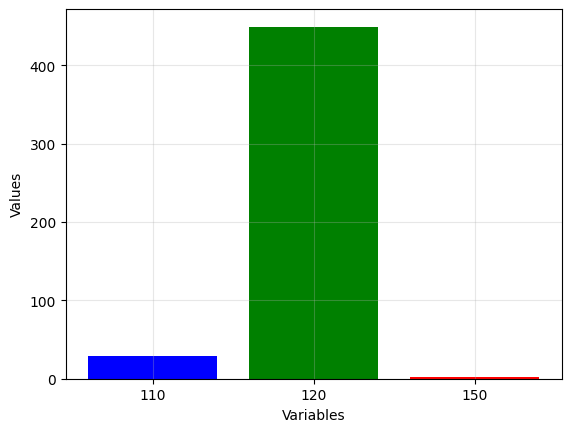

In [45]:
# Labels and values for the bar plot
labels = ['110', '120', '150']
values = [i110, i120, i150]

# Create the bar plot
plt.bar(labels, values, color=['blue', 'green', 'red'])

# Add title and labels to the plot
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(alpha=0.3)

# Display the plot
plt.show()

In [46]:
# sample_submission.to_csv("/content/brainwave 0.1.4.csv", index=False)

In [11]:
class alien():
    def __init__(self,name,job,salary):
        self.name = name
        self.job  = job
        self.sal  = salary
    def detail(self):
        print(self.name,self.job,self.sal)

In [12]:
e1 = alien('al1','j1','s1')
e2 = alien('al2','j2','s2')
e3 = alien('al3','j2','s3')
Alain_list = [e1,e2,e3]


In [14]:
Alain_list[0].detail()
Alain_list[1].detail()
Alain_list[2].detail()

al1 j1 s1
al2 j2 s2
al3 j2 s3


In [17]:
AL = []
for i in range(24):
    AL.append(alien(f"al{i}",f"J{i}",f"s{i}"))

In [19]:
for ALi in AL:
    ALi.detail()

al0 J0 s0
al1 J1 s1
al2 J2 s2
al3 J3 s3
al4 J4 s4
al5 J5 s5
al6 J6 s6
al7 J7 s7
al8 J8 s8
al9 J9 s9
al10 J10 s10
al11 J11 s11
al12 J12 s12
al13 J13 s13
al14 J14 s14
al15 J15 s15
al16 J16 s16
al17 J17 s17
al18 J18 s18
al19 J19 s19
al20 J20 s20
al21 J21 s21
al22 J22 s22
al23 J23 s23


In [ ]:
a1 = __loader__
a1 = x,y
a2 = __loader__
a2 = x,y
...
while 
    a1.render
    a2.render
    ...